# Portfolio Project on Module 2: Yelp Rating Regression Predictor
## Sifa Tok




## Table of Contents:
* [Goal](#goal)
    * [Target Variables](#target_variables)
* [Importing Necessary Packages](#import_package)
* [Data Set](#data_set)
    * [Merge all features](#merge1)
* [Scrubbing the Data](#clean1)
    * [Exploratory Anlaysis](#eda1)
    * [Conclusion](#conclusion1)
* [Data Selection](#data_select)
    * [Conclusion](#conclusion2)
* [Feature Selection](#feature_select)
    * [Define Different Subsets of Data](#subset_data)
    * [Conclusion](#conclusion3)
* [References](#References)

## Goal <a class="anchor" id="goal"></a>
In module 2 project, the datasets in '.json files' are explored. the aim of this project is to provide assistance to the decision making of the buyers/investors and investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for our restaurant with a dataset of different restaurant features and their Yelp ratings. In addition, Multiple Linear Regression analysys peformed to provide accurate predictions for ratings.

The restaurant industry is tougher than ever, with restaurant reviews blazing across the Internet from day one of a restaurant's opening. We decide to break into the industry and open up our own restaurant, One Kebap House. Since a restaurant's success is highly correlated with its reputation, we want to make sure One Kebap House has the best reviews on the most queried restaurant review site: Yelp! While we know your food will be delicious, we think there are other factors that play into a Yelp rating and will ultimately determine our business's success. 

In this project we'll be working with a real dataset provided by Yelp. For a more detailed explanation of the **target variables**<a class="anchor" id="target_variables"></a> in each .json file, see the accompanyin [explanatory feature document](https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).




## Importing Necessary Packages<a class="anchor" id="import_package"></a>

To get a better understanding of the dataset we imported a few neessary packages.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
pd.options.display.max_columns = 41
pd.options.display.max_colwidth = 100

## Data Set <a class="anchor" id="data_set"></a>

In [2]:
# checkins = pd.read_json('yelp_checkin.json', lines=True)
# data = pd.read_json('yelp_data.json', lines=True)
# photos = pd.read_json('yelp_photo.json', lines=True)
# reviews = pd.read_json('yelp_review.json', lines=True)
# tips = pd.read_json('yelp_tip.json', lines=True)
# users = pd.read_json('yelp_user.json', lines=True)

### Merge all features <a class="anchor" id="merge1"></a>

Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. We merged all dataframes to one single dataframe which is data.

In [3]:
# for i in [checkins,photos,reviews,tips,users]:
#     data = pd.merge(data, i, how='left', on='business_id')

For don't waste time to read again and again the same json files. We wrote this data dataframe to a csv file and read from it. We can delete this line from final notebook

In [4]:
# data.to_csv("merged_data.csv")

In [2]:
data =pd.read_csv("merged_data.csv", index_col=0)

## Scrubbing the Data <a class="anchor" id="clean1"></a>

After obtaining our data, it is important to check the data type and missing values for each column. Now, we are going to clean our data. This step is important to decide which column type will remain same and which will be changed to categorical data type. In that way, we can focus on the features that might have predictive power for determining an establishment's Yelp rating.



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188593 entries, 0 to 188592
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   address                     180970 non-null  object 
 1   attributes                  162807 non-null  object 
 2   business_id                 188593 non-null  object 
 3   categories                  188052 non-null  object 
 4   city                        188583 non-null  object 
 5   hours                       143791 non-null  object 
 6   is_open                     188593 non-null  int64  
 7   latitude                    188587 non-null  float64
 8   longitude                   188587 non-null  float64
 9   name                        188593 non-null  object 
 10  neighborhood                68655 non-null   object 
 11  postal_code                 187912 non-null  object 
 12  review_count                188593 non-null  int64  
 13  stars         

In [5]:
data.head(1)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,alcohol?,has_bike_parking,takes_credit_cards,good_for_kids,price_range,take_reservations,has_wifi,pic_count,time,weekday_checkins,weekend_checkins,average_caption_length,number_pics,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_tip_length,number_tips,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': ""{'garage': Fa...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0...",1,51.091813,-114.031675,Minhas Micro Brewery,NaN,T2E 6L6,24,4.0,AB,0,0,1,1,2,1,0,NaN,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': 1, 'Fri-16': 1, 'Tue-17': 1, 'Sat-18': 1, 'Tue-18'...",11.0,18.0,NaN,NaN,618.25,532.916667,0.865342,6,5,13,38.0,6.0,42.833333,1809.375,5.375,114.875,1.125


When predicting yelp rating, we are focusing on the features that might have predictive power for determining an establishment's Yelp rating. There are some continuous variables that have an affect on our dependent variable. For that reason, we removed any columns in the dataset that are not continuous or binary, and that we do not want to make predictions on. The cell below contains a list of these unnecessary features.

In [4]:
features_to_remove = ["address", "attributes","business_id","city","hours","latitude",
                      "longitude","name","neighborhood","postal_code","state","time","number_pics",
                     "average_caption_length",]
data.fillna({"pic_count":0},inplace=True)

data = data.dropna(subset=['categories'])

data.drop(features_to_remove, axis=1, inplace=True)

We removed unuseful and duplicated features. Filled null values with 0 in pic_count feature. Dropped approximately 500 rows with nulls in categories for preventing errors in further steps.

<AxesSubplot:>

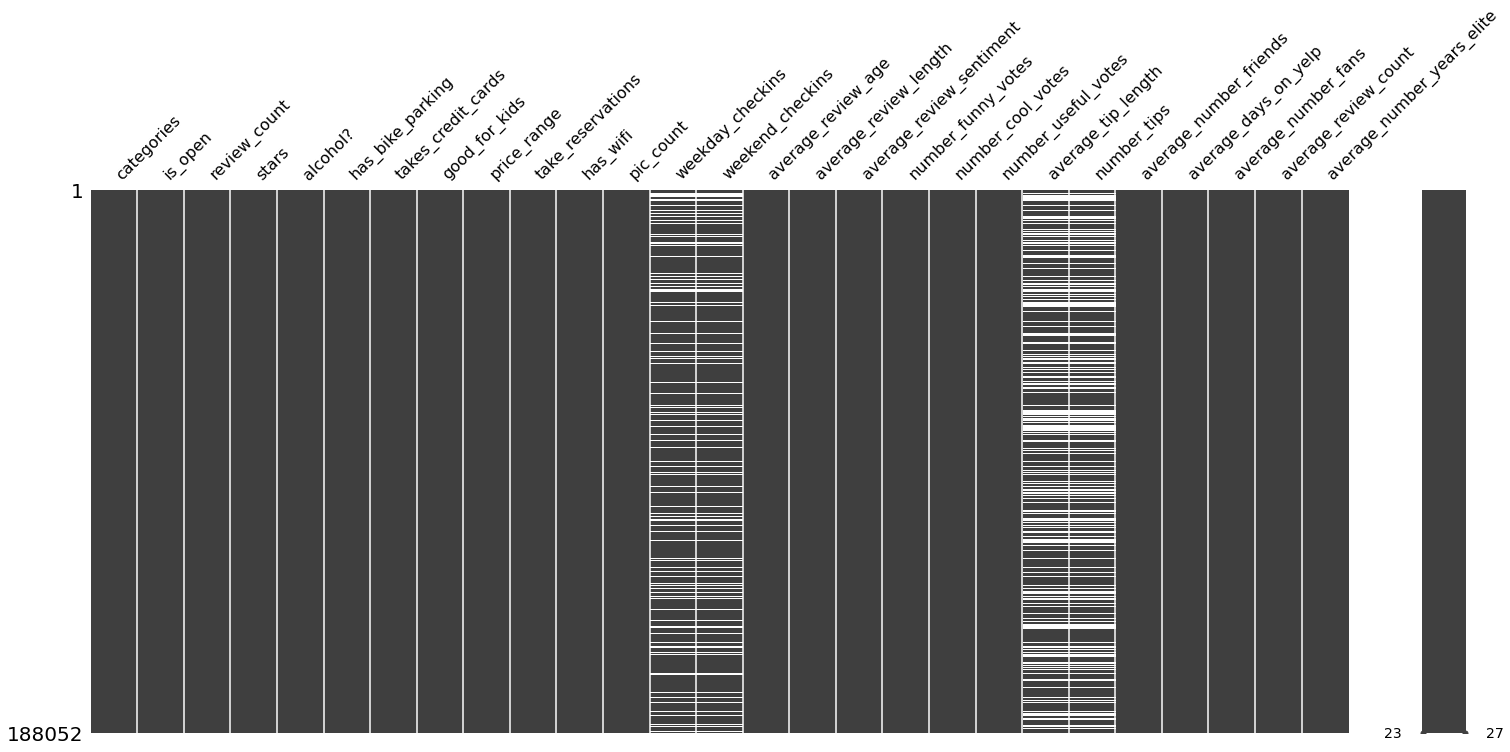

In [5]:
msno.matrix(data)

Checked missing values with missingno and obseverd 23 of 27 features don't have null values

We are looking data to decide how to fill missing values

In [6]:
data[["weekday_checkins","weekend_checkins","average_tip_length","number_tips"]].describe()

,weekday_checkins,weekend_checkins,average_tip_length,number_tips
count,156796.000000,156796.000000,121376.000000,121376.000000
mean,54.580519,59.665176,70.829642,9.762943
std,361.865282,363.839098,51.672223,32.011216
min,0.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,44.538462,1.000000
50%,8.000000,7.000000,60.000000,3.000000
75%,31.000000,31.000000,79.800000,7.000000
max,73830.000000,64647.000000,500.000000,3581.000000


In [9]:
data.number_tips.value_counts(normalize=True, dropna=False)

NaN      0.355618
1.0      0.190633
2.0      0.106579
3.0      0.066614
4.0      0.044800
           ...   
589.0    0.000005
489.0    0.000005
948.0    0.000005
421.0    0.000005
568.0    0.000005
Name: number_tips, Length: 441, dtype: float64

In [10]:
data.average_tip_length.value_counts(normalize=True, dropna=False)

NaN           0.355618
55.000000     0.003950
58.000000     0.003924
48.000000     0.003844
53.000000     0.003797
                ...   
223.666667    0.000005
50.762712     0.000005
58.960000     0.000005
77.294118     0.000005
44.789474     0.000005
Name: average_tip_length, Length: 16553, dtype: float64

In [11]:
data.weekend_checkins.value_counts(normalize=True, dropna=False)

NaN       0.167122
1.0       0.101032
0.0       0.081843
2.0       0.065819
3.0       0.048438
            ...   
2088.0    0.000005
1663.0    0.000005
1692.0    0.000005
9849.0    0.000005
1571.0    0.000005
Name: weekend_checkins, Length: 1910, dtype: float64

In [12]:
data.weekday_checkins.value_counts(normalize=True, dropna=False)

NaN       0.167122
1.0       0.102533
2.0       0.068926
0.0       0.062531
3.0       0.049901
            ...   
1725.0    0.000005
1462.0    0.000005
2423.0    0.000005
2911.0    0.000005
4262.0    0.000005
Name: weekday_checkins, Length: 1759, dtype: float64

It seems there are some outliers so it is good to use median or mode to not add bias.
We copied data to use it for different combinations of filling missing values. Since the data seems still valuable and we would like to compare the results by both keeping and dropping data. 


***

In [7]:
dataNotMissingFeatures = data.copy()
dataFiiledMean = data.copy()
dataFiiledMedian = data.copy()
dataFiiledMode = data.copy()

We copy data to use it for diffirent combinations to fill missing values

In [8]:
dataNotMissingFeatures.drop(["weekday_checkins", "weekend_checkins", "average_tip_length", "number_tips"], axis=1, inplace=True)

To compare different models first we prepared one dataframe by droping features that has missing values.

In [9]:
dataFiiledMean.fillna({'weekday_checkins':dataFiiledMean['weekday_checkins'].mean(),
           'weekend_checkins':dataFiiledMean['weekend_checkins'].mean(),
           'average_tip_length':dataFiiledMean['average_tip_length'].mean(),
           'number_tips':dataFiiledMean['number_tips'].mean()},
          inplace=True)
dataFiiledMedian.fillna({'weekday_checkins':dataFiiledMedian['weekday_checkins'].median(),
           'weekend_checkins':dataFiiledMedian['weekend_checkins'].median(),
           'average_tip_length':dataFiiledMedian['average_tip_length'].median(),
           'number_tips':dataFiiledMedian['number_tips'].median()},
          inplace=True)
dataFiiledMode.fillna({'weekday_checkins':dataFiiledMode['weekday_checkins'].mode()[0],
           'weekend_checkins':dataFiiledMode['weekend_checkins'].mode()[0],
           'average_tip_length':dataFiiledMode['average_tip_length'].mode()[0],
           'number_tips':dataFiiledMode['number_tips'].mode()[0]},
          inplace=True)


The *'weekday_checkins', 'weekend_checkins', 'average_tip_length' and 'number_tips'* columns have missing values. There are not given a value in these columns. When we analyzed the data, we can predicted that there might no checkins on weekends or weekdays. Therefore, no data was entered. Also when we look at the 'number_tips', it is not necessary to give a tip, so there might be missing data in this column. However, by filling the data with mean, median and mode , we wouldn't lose any data.

### Exploratory Analysis<a class="anchor" id="eda1"></a>

Now, our data is all together. It is essential to see what might correlate most with our dependent variable, the Yelp rating. We would like to know which features are most important to predict our target variable. For this reason, we used the .corr() method that allows us to see the correlation coefficients for each pair of our different features.

In [12]:
dataFiiledMedianWOCat = dataFiiledMedian.drop(["categories"], axis=1)

We droped categories feature from dataFilledMedian dataframe as its type is object

In [13]:
dataFiiledMedianWOCat.corr().stars.sort_values()

average_review_length        -0.277069
average_review_age           -0.127189
average_review_count         -0.067983
average_number_years_elite   -0.066703
price_range                  -0.056562
alcohol?                     -0.045047
has_wifi                     -0.041550
average_days_on_yelp         -0.039449
average_tip_length           -0.036605
good_for_kids                -0.032849
average_number_fans          -0.032337
take_reservations            -0.025859
average_number_friends       -0.008840
number_useful_votes          -0.000735
number_funny_votes            0.000877
pic_count                     0.001081
weekday_checkins              0.004097
weekend_checkins              0.007743
number_tips                   0.016108
review_count                  0.031607
takes_credit_cards            0.032272
number_cool_votes             0.042794
is_open                       0.053793
has_bike_parking              0.065641
average_review_sentiment      0.781280
stars                    

It seems that average_review_sentiment, average_review_length, average_review_age are top three correlated features

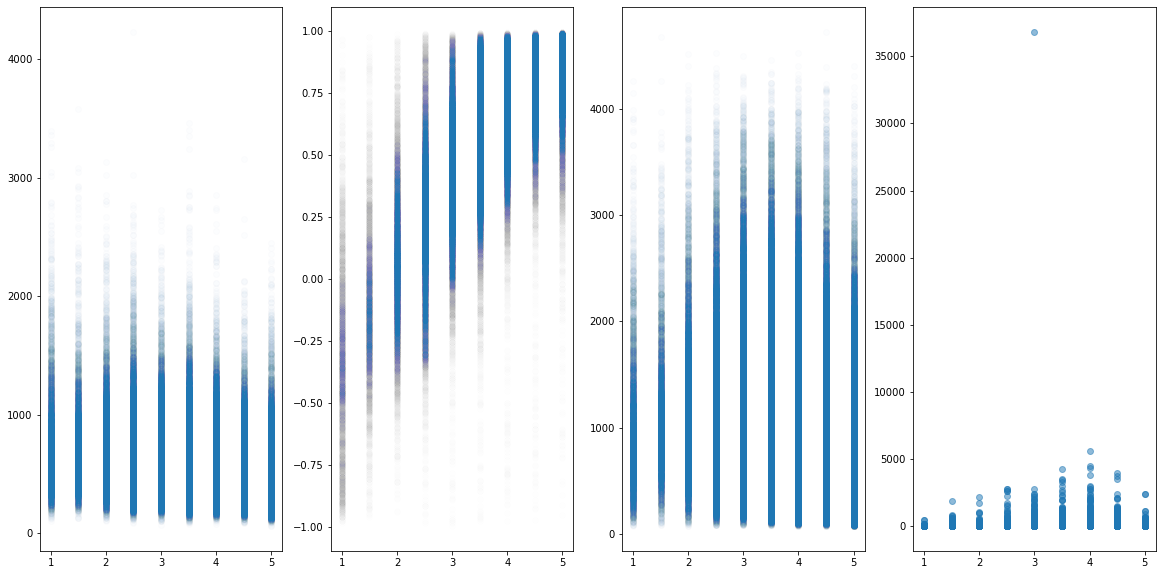

In [14]:
# featuresToPlot = ["average_review_sentiment","average_review_length","average_review_age","number_funny_votes"]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)

ax1.scatter(dataFiiledMedianWOCat.stars, dataFiiledMedianWOCat["average_review_length"], alpha=.01)
ax2.scatter(dataFiiledMedianWOCat.stars, dataFiiledMedianWOCat["average_review_sentiment"], alpha=.005)
ax3.scatter(dataFiiledMedianWOCat.stars, dataFiiledMedianWOCat["average_review_age"], alpha=.01)
ax4.scatter(dataFiiledMedianWOCat.stars, dataFiiledMedianWOCat["number_funny_votes"], alpha=.5)
plt.show()

### Conclusion <a class="anchor" id="conclusion1"></a>

We would like to visualize the columns with scatter plot to see certain features against our dependent variable, the Yelp rating.

-It is obvious that there is a positive lineer relationship between 'average_review_sentiment' and 'stars'. It would be a good predictor for our model.

-'average_review_length' shows there is not a clear linearity.

-'average_review_age' shows continuity but not a clear positive linearity.

-'number_funny_votes' column seems to have outliers. Outliers might mislead the model so, we filtered the outliers to see actual data. We detect some outliers from figures so we decided to create one dataframe with filled with median in missing values and eliminated outliars by excluding raws that have values which are 3 standart deviation far from center of its distiribution

In [15]:
dataFiiledMedianWOutliars = dataFiiledMedianWOCat.copy()[(np.abs(stats.zscore(dataFiiledMedianWOCat)) < 3).all(axis=1)]
dataFiiledMedianWOutliars.shape

(165299, 26)

## Data Selection

We have 5 different data according to handling missing values These are :

***dataFiiledMedianWOutliars*** : dataframe filled with median in missing values and without outliars

***dataFiiledMode***            : dataframe filled with mode in missing values

***dataFiiledMedian***          : dataframe filled with median in missing values

***dataFiiledMean***            : dataframe filled with mean in missing values

***dataNotMissingFeatures***    : dataframe droped four feature that have missing values

They have all raws. We can split them according food related or not

## Data Selection <a class="anchor" id="data_select"></a>

We have 5 different data according to handling missing values. These are dataFiiledMedianWOutliars, dataFiiledMode, dataFiiledMedian, dataFiiledMean, dataNotMissingFeatures. They have all raws. We can split them according food related or not

We read food related words from "maskforwordsV2.csv"

In [17]:
maskforwords = pd.read_csv("maskforwordsV2.csv")
maskforwords.head()

,name,boolean
0,Breweries,1
1,Pizza,1
2,Restaurants,1
3,Food,1
4,Chicken Wings,1


In [23]:
words = maskforwords["name"].tolist()
words = set([i.strip() for i in words])

We selected unique food related words for searching this words in categories feature

In [25]:
def foodsInCategories(sentence):
    """takes a string from a Series returns a mask with true if string contains a word from a words list else false"""
    flag = False
    for word in words:
        if word in str(sentence):
            flag = True
            break
        else:
            pass
    return flag

Defined function to create mask if categories has food related words

In [26]:
foodMask = data.categories.apply(foodsInCategories)

Applied function to categories feature

In [27]:
foodMask.value_counts()

False    94996
True     93056
Name: categories, dtype: int64

Approximately half of the data (95537 raws) are not food related business.

In [28]:
dataFramesWithAllRawsList = [dataFiiledMedianWOutliars, dataFiiledMode, dataFiiledMedian, dataFiiledMean, dataNotMissingFeatures]

Five dataframe added to a list to subset food related raws

In [29]:
for i in [dataFiiledMode, dataFiiledMedian, dataFiiledMean, dataNotMissingFeatures]:
    i.drop(["categories"], axis=1,inplace=True)

Droping Categories from dataframes to get just numerical features

In [30]:
dataFramesWithFrRawsList = []
for i in dataFramesWithAllRawsList:
    dataFramesWithFrRawsList.append(i[foodMask])
AllDataframes =dataFramesWithFrRawsList + dataFramesWithAllRawsList


<ipython-input-30-1ff0c557dc89>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataFramesWithFrRawsList.append(i[foodMask])


We toke our five dataframes and created five more with subsetting them by selecting foodrelated raws

In [31]:
len(AllDataframes)

10

In [32]:
dfnames = ['dataFiiledMedianWOutliars', 'dataFiiledMode', 'dataFiiledMedian', 'dataFiiledMean', 'dataNotMissingFeatures',
'dataFiiledMedianWOutliarsFood', 'dataFiiledModeFood', 'dataFiiledMedianFood', 'dataFiiledMeanFood', 'dataNotMissingFeaturesFood']

We have ten dataframes and listed their names in another list to use while comparing our models

### Conclusion <a class="anchor" id="conclusion2"></a>

After the filling data and splitting them into the food-related or not, we are creating a new data frame which contains all raw list. At this point, we have 10 different datasets to decide which one can give us the best result for our model. 

***

## Feature Selection <a class="anchor" id="feature_select"></a>

Now, we are creating our model. At first, we need to break our data into a training set and a test set so we can evaluate how well our model performs. Then, our data is split into training and testing sets and we used the .fit() method to fit our Linear Regression model to our training data and calculate the coefficients for our features. We used the .score() function on our model to calculate our training $R^2$ score to see how it can be effectively predict Yelp rating. 

In [27]:
def model_these_features(dflist,dfnames, feature_list):
    """takes dataframes, dataframe names and feature list and trains a model with this features and returns scores and coeficients in a dataframe"""

    modelscores = {} #Creaed a dictionary to store model informations
    
    for i in range(len(dflist)): #for loop for creation model for every dataframe
        
        #precaution for if df is don't have filled features this part removes this features
        checkset = set(["weekday_checkins", "weekend_checkins", "average_tip_length", "number_tips"]).intersection(feature_list)
        if checkset:
            for h in checkset:      
                feature_list.remove(h)
                
        ratings = dflist[i].loc[:,'stars'] #depended variable
        features = dflist[i].loc[:,feature_list] #independed variables
    
        X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
        #check for if features has one feature reshape it to prevent error while fitting the model
        if len(X_train.shape) < 2:
            X_train = np.array(X_train).reshape(-1,1)
            X_test = np.array(X_test).reshape(-1,1)
    
        model = LinearRegression() #created lineer regression object as a model
        model.fit(X_train,y_train) #line fitted to data
        
        #model coefficients and related feature stored in a dictionary with three digit presicion
        coefs = {X_train.columns[j]:round(model.coef_[j], 3) for j in range(len(X_train.columns))}
        coefs["Train score:"] = model.score(X_train, y_train)
        coefs["Test score:"] = model.score(X_test, y_test)
        
        #model statistics turned into pandas dataframe with related dataframe name to make comparison easy
        modelscores[dfnames[i]] = pd.DataFrame.from_dict(coefs, orient='index')
        
    return modelscores


***

### Define Different Subsets of Data  <a class="anchor" id="subset_data"></a>

In [28]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [29]:
# subset of all features that have a response range [0,1]
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [30]:
# subset of all features that vary on a greater range than [0,1]
numeric_features = ['review_count','price_range','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [31]:
# all features
all_features = binary_features + numeric_features

In [32]:
# Our own feature subset that we can affect as restaurant owner
feature_subset = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi',
                  'price_range','average_tip_length','number_tips','weekday_checkins','weekend_checkins','average_number_years_elite']

In [33]:
resultDict = model_these_features(AllDataframes,dfnames, feature_subset)

In [34]:
scores = pd.concat([value.rename(columns={0: key}) for key,value in resultDict.items()], axis=1)
scores

,dataFiiledMedianWOutliars,dataFiiledMode,dataFiiledMedian,dataFiiledMean,dataNotMissingFeatures,dataFiiledMedianWOutliarsFood,dataFiiledModeFood,dataFiiledMedianFood,dataFiiledMeanFood,dataNotMissingFeaturesFood
alcohol?,-0.072000,-0.054000,-0.054000,-0.054000,-0.054000,-0.113000,-0.097000,-0.097000,-0.097000,-0.097000
has_bike_parking,0.170000,0.184000,0.184000,0.184000,0.184000,0.226000,0.247000,0.247000,0.247000,0.247000
takes_credit_cards,-0.020000,-0.003000,-0.003000,-0.003000,-0.003000,0.086000,0.117000,0.117000,0.117000,0.117000
good_for_kids,-0.239000,-0.211000,-0.211000,-0.211000,-0.211000,-0.117000,-0.078000,-0.078000,-0.078000,-0.078000
take_reservations,0.110000,0.102000,0.102000,0.102000,0.102000,0.079000,0.082000,0.082000,0.082000,0.082000
has_wifi,-0.013000,0.007000,0.007000,0.007000,0.007000,-0.123000,-0.106000,-0.106000,-0.106000,-0.106000
price_range,-0.053000,-0.042000,-0.042000,-0.042000,-0.042000,-0.099000,-0.093000,-0.093000,-0.093000,-0.093000
average_number_years_elite,-0.069000,-0.045000,-0.045000,-0.045000,-0.045000,-0.088000,-0.043000,-0.043000,-0.043000,-0.043000
Train score:,0.031092,0.023519,0.023519,0.023519,0.023519,0.029725,0.021094,0.021094,0.021094,0.021094
Test score:,0.034261,0.028358,0.028358,0.028358,0.028358,0.030283,0.022935,0.022935,0.022935,0.022935


Ten different model created with our **Feature Subset** and combined as dataframe to show model statistic

In [35]:
resultDict = model_these_features(AllDataframes,dfnames, all_features)

In [36]:
scores = pd.concat([value.rename(columns={0: key}) for key,value in resultDict.items()], axis=1)
scores

,dataFiiledMedianWOutliars,dataFiiledMode,dataFiiledMedian,dataFiiledMean,dataNotMissingFeatures,dataFiiledMedianWOutliarsFood,dataFiiledModeFood,dataFiiledMedianFood,dataFiiledMeanFood,dataNotMissingFeaturesFood
alcohol?,-0.114000,-0.119000,-0.119000,-0.119000,-0.119000,-0.155000,-0.151000,-0.151000,-0.151000,-0.151000
has_bike_parking,0.015000,0.017000,0.017000,0.017000,0.017000,0.017000,0.021000,0.021000,0.021000,0.021000
takes_credit_cards,0.011000,-0.015000,-0.015000,-0.015000,-0.015000,0.035000,0.017000,0.017000,0.017000,0.017000
good_for_kids,-0.159000,-0.155000,-0.155000,-0.155000,-0.155000,-0.136000,-0.127000,-0.127000,-0.127000,-0.127000
take_reservations,0.017000,0.027000,0.027000,0.027000,0.027000,-0.007000,0.011000,0.011000,0.011000,0.011000
has_wifi,-0.070000,-0.071000,-0.071000,-0.071000,-0.071000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000
review_count,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
price_range,-0.055000,-0.047000,-0.047000,-0.047000,-0.047000,-0.065000,-0.065000,-0.065000,-0.065000,-0.065000
average_review_age,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
average_review_length,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000,-0.001000


Ten different model created with our **All Features** and combined as dataframe to show model statistic

## Conclusion  <a class="anchor" id="conclusion3"></a>

When we look at 10 different models that we build, maximum test and train score that we reached comes from missing values handling with filling median and without outliers which is 69% train and 70% test score. We can observe that outliers have large effect on our dataset. if we look at our features one by one `average_review_sentiment` dominates rest of the features. Hence, we decided to build another 10 different models and we removed `average_review_sentiment` to see other features' effects clearly. In addition,  we include features that we can deal with directly. we include `alcohol?`, `has_bike_parking`, `takes_credit_cards`, `good_for_kids`, `take_reservations`, `has_wifi`, `price_range`, `average_number_years_elite` features. Because, as a restraunt owner we can control directly these features. However, rest of the features come from customers' evaluation. When we remove `average_review_sentiment`, our test and train score decreased significantly so we use these models only to see features effects one by one. After eliminating `average_review_sentiment` feaures we observe that `has_bike_parking` has positive large effect which is more than 0.24. On the contrary, `good_for_kids` has negative effect on our test and train score which is almost -0.24. Therefore, we can say that customers tend to rate fewer stars where cafes are child friendly.

## References <a class="anchor" id="References"></a>

- Yelp Dataset
- Code Academy
- Stackoverflow
- Flatiron School